# Project: Analysis of Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This project provides an analysis of data collected from a movie database. We will specifically look at trends in the movies that had low production cost and how they differed from those that had medium and high production cost. We will also rate how the movies did (as Bad, Good or Great) based on the average votes (vote_average) and analyse trends and interelation between these categorical variables and other independent variables.

> **Note**: This analysis seeks to answer two question:
    1. Which budget category (budget_type) makes the highest profits? Also explore relations with other variables
    2. Which director has the most movies between 2010 and 2015? How do they compare to the perfomance of director with the most movies in the dataset ?
    
    
Let us first import the necessary packages for analysis and visualizations.


In [96]:
#importing the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Note**: In this section, we load in the data,quickly assess it, checking for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

Let us then load the data and take a qucik glance to asses it.

We will check the dataset characteristics, datatype formats, duplicates and missing values. We will then look at the summary statistics to familiarize with the dataset.

In [97]:
#Loading the data


df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [98]:
#checking number of rows and columns

df.shape

(10866, 21)

In [99]:
#checking dataset characteristics

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [100]:
#checking for datatypes formats

df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [101]:
#checking for dublicates

print(df.duplicated().sum())

1


> Now let's create a function to check columns for missing values and the percentage that's missing.

We will first check for the sum of all missing values per column and sort them from the column with the highest missing values to the least. We will do the same for percantages and only display the columns with missing values (percentage of missing values alongside total number of missing values).

In [102]:
def check_NaNs(df):
    '''
    Takes df
    Checks missing values
    '''
    
    #checking the dataframe to see if any columns have missing values
    if df.isnull().sum().sum() > 0:
        
        #checking for number missing values per column and output only those with missing values
        Nan_values = df.isnull().sum().sort_values(ascending=False) 
        total = Nan_values[Nan_values > 0]
        
        #checking for percentage of missing values per column and output only those with missing values
        Nan_percentage = df.isnull().mean().sort_values(ascending=False) 
        percentage = Nan_percentage[Nan_percentage > 0] 

        missing_values = pd.concat([total, percentage], axis=1, keys=['Total', 'Percentage'])
    
        print(f'Total and Percentage of NaN:\n {missing_values}')
    else: 
        print('No NaN found.')
        
        
check_NaNs(df)

Total and Percentage of NaN:
                       Total  Percentage
homepage               7930    0.729799
tagline                2824    0.259893
keywords               1493    0.137401
production_companies   1030    0.094791
cast                     76    0.006994
director                 44    0.004049
genres                   23    0.002117
imdb_id                  10    0.000920
overview                  4    0.000368


It appears the homepage column has the most missing values and overview column with the least.

In [103]:
 # summary statistics

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Note 1**: Based on the above outputs, the dataset has 10,866 rows of data and 21 columns. Some rows have missing values, there is 1 duplicate row and 2 columns (release_date and release_year) have wrong datatype formats.

> **Note 2**: Most of the columns in the dataset will not be needed in the analysis. Therefore, to narrow the analysis down to only the required columns, we will drop all columns unnecessary in the analysis. This will help work with a smaller dataset.


### Data Cleaning 
>**Note**: We will clean the dataset in the following order:
    - drop collumns that won't be used in the analysis
    - fix columns with the wrong datatypes
    - check for duplicates in the dataset and drop them
    - check for missing values in each columns and fix them

In [104]:

#dropping rows that won't be used

df.drop(['homepage', 'tagline', 'keywords', 'cast', 'overview', 'imdb_id', 'budget', 'revenue', 'production_companies', 'id'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   original_title  10866 non-null  object 
 2   director        10822 non-null  object 
 3   runtime         10866 non-null  int64  
 4   genres          10843 non-null  object 
 5   release_date    10866 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


The above dropped columns will not be needed in the analysis. 

> **Note 1**: Instead of using the budget and revenue columns, we will use the ones adjusted to inflation (revenue_adj and budget_adj).  We also drop the imdb_id and id columns as they won't be used anywhere in the analysis.

> **Note 2**: It is also important to note that most of the missing values are found in some of the above dropped columns, this therefore reduces the burden of having to fill missing rows. There still are, however, rows in the dataset with missing entries. We will address those in the cell operations below

In [105]:
#fixing datatypes

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = pd.to_datetime(df['release_year'])

df.dtypes

popularity               float64
original_title            object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year      datetime64[ns]
budget_adj               float64
revenue_adj              float64
dtype: object

Notice the formats for release_date and release_year have been corrected

In [106]:
#droping duplicates

df.drop_duplicates(inplace=True)

In [107]:
#confirming for dublucates
print(df.duplicated().sum())

0


Confrirmed above, there are no duplicate entries

> *Tip*: Below, we address the issue of missing values in some rows. Lets look again at the remaining columns with missing values

In [108]:
#view missing counts for each column

df.isnull().sum()

popularity         0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

>*Note*: As seen above, the only columns with missing values are the <b>director</b> and <b>genres</b> columns. Since the datatypes for these columns are object(string), we cannot use the "fill the mean" method to fill in the mean values of these columns in the missing entries. Also, the values for each row in these two columns is specific to each movie, this makes it harder to fill in random strings.

For the above reasons, we will drop the rows with missing values.

In [109]:
#dropping remaining rows with missing

df.dropna(inplace=True)

In [110]:
#cheking if columns have null values

df.isnull().sum().any()

False

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10800 non-null  float64       
 1   original_title  10800 non-null  object        
 2   director        10800 non-null  object        
 3   runtime         10800 non-null  int64         
 4   genres          10800 non-null  object        
 5   release_date    10800 non-null  datetime64[ns]
 6   vote_count      10800 non-null  int64         
 7   vote_average    10800 non-null  float64       
 8   release_year    10800 non-null  datetime64[ns]
 9   budget_adj      10800 non-null  float64       
 10  revenue_adj     10800 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 1012.5+ KB


Now our dataset is clean.


>*Note*: Before moving on to EDA, lets make a structural modifications to the dataset. We will check for, and drop rows in the budget_adj and revenue_adj columns whose values are <b>zero</b>. This is because we will need to compute for profits & losses incurrred by the movies.

In [112]:
#structural modifications - dropping rows with 0 budget

df = df[(df.budget_adj != 0) & (df.revenue_adj != 0) ]

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3853 non-null   float64       
 1   original_title  3853 non-null   object        
 2   director        3853 non-null   object        
 3   runtime         3853 non-null   int64         
 4   genres          3853 non-null   object        
 5   release_date    3853 non-null   datetime64[ns]
 6   vote_count      3853 non-null   int64         
 7   vote_average    3853 non-null   float64       
 8   release_year    3853 non-null   datetime64[ns]
 9   budget_adj      3853 non-null   float64       
 10  revenue_adj     3853 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 361.2+ KB


In [114]:
df.shape

(3853, 11)

The above modification leaves us with a smaller, more accurate dataset. (3853 rows, 11 columns)

<a id='eda'></a>
## Exploratory Data Analysis

   > **Note 1**: Now that we've trimmed and cleaned the data, let us move on to exploration. We will first of all generate new columns. These are <b>profits</b> (revenue_adj - budget_adj) <b>budget_type</b> (Low, Medium and High budget movies) and <b>rating</b>(Bad, Good or Great) for the movie rating.

> **Note 2**: The budget_type is derived from the amount of money used in the production of a movie while the rating is derived from the vote_average percentiles.

> **Note 3**: The reason for creating the budget_type and rating columns is that the budget_adj and vote_count columns(which are key in answering the analysis quetsions) have no clear categories and so there is need to engineer categorical variables.
    
    First we create the profits column, then the budget_type and finally the rating column.





In [115]:
#creating a profits column 
df = df.assign(profits = df.revenue_adj - df.budget_adj)

#confirmation
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3853 non-null   float64       
 1   original_title  3853 non-null   object        
 2   director        3853 non-null   object        
 3   runtime         3853 non-null   int64         
 4   genres          3853 non-null   object        
 5   release_date    3853 non-null   datetime64[ns]
 6   vote_count      3853 non-null   int64         
 7   vote_average    3853 non-null   float64       
 8   release_year    3853 non-null   datetime64[ns]
 9   budget_adj      3853 non-null   float64       
 10  revenue_adj     3853 non-null   float64       
 11  profits         3853 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(3)
memory usage: 391.3+ KB


In the cell above, we create a column <b>"profits"</b> whose contents are the difference of the revenue_adj column and budget_adj column.

    Now lets categorize movies by the amount of money it took to produce

In [116]:
# categorizing movies in Low, Medium and High budget

df['budget_type']=pd.cut(df['budget_adj'], bins=3, labels= ('Low', 'Medium', 'High'))
df.head()

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits,budget_type
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09,1.254446e+09,Low
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,1970-01-01 00:00:00.000002015,1.379999e+08,3.481613e+08,2.101614e+08,Low
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,1970-01-01 00:00:00.000002015,1.012000e+08,2.716190e+08,1.704191e+08,Low
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,1970-01-01 00:00:00.000002015,1.839999e+08,1.902723e+09,1.718723e+09,Medium
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,1970-01-01 00:00:00.000002015,1.747999e+08,1.385749e+09,1.210949e+09,Medium


    Above, we are creating the column <b>"budget_type"</b> from the budget_adj column. 
Here, we use "cut" function to divide the max budget value to 3 equal percentiles. We then create 3 bins which we label as <b>Low, Medium and High</b> with each representing the a range of values related to each of the three percentiles. 

In [117]:
# creating rating column

df['rating']=pd.cut(df['vote_average'], bins=3, labels= ('Bad', 'Good', 'Great'))
df.head()

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits,budget_type,rating
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09,1.254446e+09,Low,Great
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,1970-01-01 00:00:00.000002015,1.379999e+08,3.481613e+08,2.101614e+08,Low,Great
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,1970-01-01 00:00:00.000002015,1.012000e+08,2.716190e+08,1.704191e+08,Low,Good
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,1970-01-01 00:00:00.000002015,1.839999e+08,1.902723e+09,1.718723e+09,Medium,Great
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,1970-01-01 00:00:00.000002015,1.747999e+08,1.385749e+09,1.210949e+09,Medium,Great


 And finally, creating the column <b>"rating"</b> from the vote_count column. 
Here, we also use "cut" function to divide the maximum vote_count to 3 equal percentiles. We then create 3 bins which we label as <b>Bad, Good and Great</b> with each representing the a range of values related to each of the three percentiles. 

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3853 non-null   float64       
 1   original_title  3853 non-null   object        
 2   director        3853 non-null   object        
 3   runtime         3853 non-null   int64         
 4   genres          3853 non-null   object        
 5   release_date    3853 non-null   datetime64[ns]
 6   vote_count      3853 non-null   int64         
 7   vote_average    3853 non-null   float64       
 8   release_year    3853 non-null   datetime64[ns]
 9   budget_adj      3853 non-null   float64       
 10  revenue_adj     3853 non-null   float64       
 11  profits         3853 non-null   float64       
 12  budget_type     3853 non-null   category      
 13  rating          3853 non-null   category      
dtypes: category(2), datetime64[ns](2), float64(5), int64(2)

Now we are ready to start our analyis

### Question 1: Which budget category made the highest profits?

Let us first look at how many movies are in each budget category and the mean profits of each.

In [119]:
#number of movies in each budget category

df['budget_type'].value_counts()

Low       3667
Medium     182
High         4
Name: budget_type, dtype: int64

In [120]:
# mean pofits for each budget category 

df.groupby('budget_type').profits.mean()

budget_type
Low       7.841672e+07
Medium    3.799512e+08
High      2.585641e+08
Name: profits, dtype: float64

Based on the above computations, lets draw visualizations to help us answer the question 

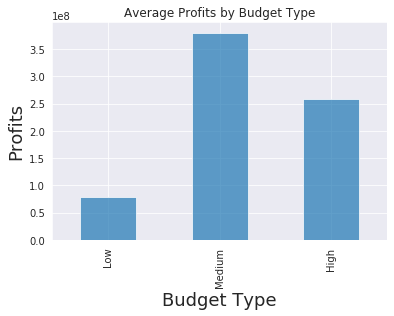

In [121]:
#medium budget films seem to make lots of profits

btype_means =df.groupby('budget_type').profits.mean()
btype_means.plot(kind='bar', title='Average Profits by Budget Type', alpha=.7);
plt.xlabel('Budget Type', fontsize=18)
plt.ylabel('Profits', fontsize=18);

Let's plot a histogram to view the computation to detail

>**Note**: We will first create masks for the three categories. Each mask contains the mean profit for that specific budgte category.
Then we will use the masks to plot relations on the histogram

In [122]:
#creating masks for the above categories

LowB = df.budget_type == "Low"
MediumB = df.budget_type == "Medium"
HighB = df.budget_type == "High"

In [123]:
# Calculating mean profits for low budget films
df.profits[LowB].mean()

78416715.89339985

In [124]:
# Calculating mean profits for medium budget films
df.profits[MediumB].mean()

379951220.73935145

In [125]:
# Calculating mean profits for high budget films
df.profits[HighB].mean()

258564134.329813

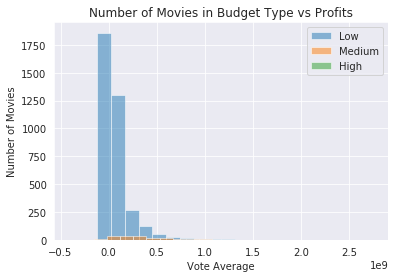

In [126]:
#histograms for the above computation

df.profits[LowB].hist(alpha=0.5, bins=20, label='Low')
df.profits[MediumB].hist(alpha=0.5,bins=20, label='Medium')
df.profits[HighB].hist(alpha=0.5, bins=20, label='High')
plt.title('Number of Movies in Budget Type vs Profits')
plt.xlabel('Vote Average')
plt.ylabel('Number of Movies')
plt.legend();

>**Answer**: Medium-budget films

>**Insight**: The analysis above shows the meduim-budget movies made the most mean profits followed by the high-budget movies while the low-budget movies made the lowest mean profits.

>**Note**: Clearly, the category with the most movies(Low-budget), does not make the biggest average profit. Neither does the one with high-budget films.

Now let's explore its corelations with vote counts, movie popularity and average votes to possibly see why

### Vote Counts

Let's look at how the vote counts relate to medium budget films having the highest profits

In [127]:
# Calculating average vote counts in each budget_type

df.groupby('budget_type')['vote_count'].mean()

budget_type
Low        443.577584
Medium    2200.604396
High      1678.500000
Name: vote_count, dtype: float64

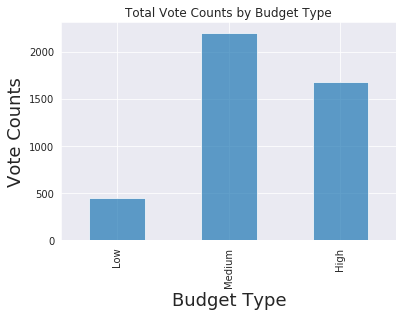

In [128]:
#plotting budget type against the mean vote counts

btype_means =df.groupby('budget_type').vote_count.mean()
btype_means.plot(kind='bar', title='Total Vote Counts by Budget Type', alpha=.7);
plt.xlabel('Budget Type', fontsize=18)
plt.ylabel('Vote Counts', fontsize=18);

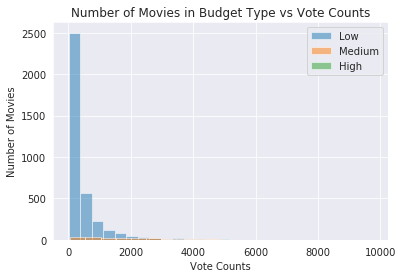

In [129]:
# plotting histogram for budget type against the mean vote counts

df.vote_count[LowB].hist(alpha=0.5, bins=20, label='Low')
df.vote_count[MediumB].hist(alpha=0.5,bins=20, label='Medium')
df.vote_count[HighB].hist(alpha=0.5, bins=20, label='High')
plt.title('Number of Movies in Budget Type vs Vote Counts')
plt.xlabel('Vote Counts')
plt.ylabel('Number of Movies')
plt.legend();

The above analysis shows average number of votes for medium budget films is highest, followed by high budget films and lastly low budget films.

More people voted for medium budget films, this could mean more people watch medium budget films than high and low budget films. It is however important to note that the number of high budget films is staggeringly low.

Now lets look at popularity

### Movie Popularity

Let's look at whether the movie popularity relates to medium budget films having the highest profits

We first look mean popularity for each budget category and then we plot our findings

In [130]:
# Calculating at populairty in each budget_type

df.groupby('budget_type')['popularity'].mean()

budget_type
Low       1.087173
Medium    3.259945
High      3.032098
Name: popularity, dtype: float64

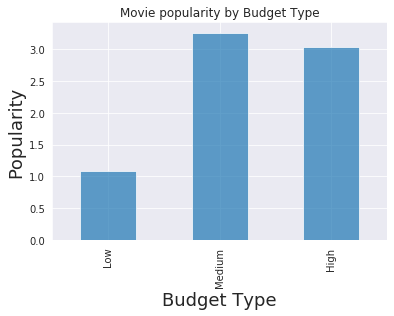

In [131]:
# plotting budget type against the mean movie popularity

btype_means =df.groupby('budget_type').popularity.mean()
btype_means.plot(kind='bar', title='Movie popularity by Budget Type', alpha=.7);
plt.xlabel('Budget Type', fontsize=18)
plt.ylabel('Popularity', fontsize=18);

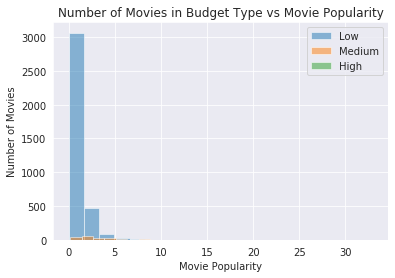

In [132]:
# plotting histogram for budget type against the mean movie popularity

df.popularity[LowB].hist(alpha=0.5, bins=20, label='Low')
df.popularity[MediumB].hist(alpha=0.5,bins=20, label='Medium')
df.popularity[HighB].hist(alpha=0.5, bins=20, label='High')
plt.title('Number of Movies in Budget Type vs Movie Popularity')
plt.xlabel('Movie Popularity')
plt.ylabel('Number of Movies')
plt.legend();


The visualizations above show that medium budget films are the most popular, followed by high then low budget films. This shows a positive relation between vote count and popularity

Now lets look at vote average

### Vote Average

Let's look at whether the average votes relates to medium budget films having the highest profits

We first look means for each budget category and then we plot our findings

In [133]:
# Calculating mean average votes in each budget_type

df.groupby('budget_type')['vote_average'].mean()

budget_type
Low       6.157704
Medium    6.380220
High      6.200000
Name: vote_average, dtype: float64

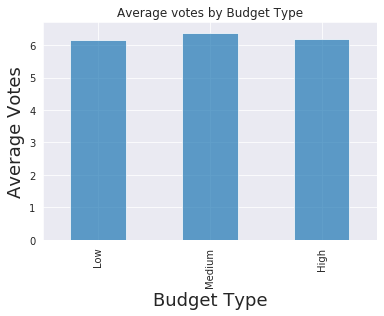

In [134]:
# plotting budget type against the mean vote average

labels = ['Low', 'Medium', 'High']
btype_means =df.groupby('budget_type').vote_average.mean()
btype_means.plot(kind='bar', title='Average votes by Budget Type', alpha=.7);
plt.xlabel('Budget Type', fontsize=18) 
plt.ylabel('Average Votes', fontsize=18)
plt.show();

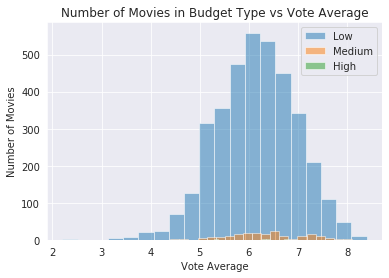

In [135]:
# plotting histogram for budget type against the mean vote average

df.vote_average[LowB].hist(alpha=0.5, bins=20, label='Low')
df.vote_average[MediumB].hist(alpha=0.5,bins=20, label='Medium')
df.vote_average[HighB].hist(alpha=0.5, bins=20, label='High')
plt.title('Number of Movies in Budget Type vs Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Number of Movies')
plt.legend();

The analysis and visualizations above show the mean in average votes for the medium-budget movies to be the highest, followed by the high-budget movies and lastly the low-budget movies

>**Note**: This is a trend with all budget categories against these variables (profits, vote counts, popularity and average votes). 
Medium-budget movies - highest
High-budget movies - mid
Low-budget movies - lowest

 ### Question 2 : Which director has the most movies between 2010 and 2015? How do they compare to the perfomance of director with the most movies in the dataset ?
 
 >**Note**: The comparison will be within the years 2010 and 2015. We will look at the director with the most movies in the dataset and compare them to the director with the most movies between the years 2010 and 2015. We will look at how these directors perfom in those years, the number of movies they make, the mean profits, mean vote counts, popularity and average votes for their movies in those years
 
 1. First, lets find the director with the most movies overall.
 2. Then we will filter our dataframe between two dates ( 1st January-2010 and 1st January-2015)
 3. Find the director who produced the most movies between those dates
 4. Then answer our question and explore their relations

In [136]:
# Findig director with the most movies

df['director'].mode()

0    Steven Spielberg
dtype: object

The director with the most movies in the dataframe is **Steven Spielberg**

Below,we create a new dataframe which will hold the data filtered by release_data.

We call this dataframe **df_dir** (director's dataframe)

In [137]:
# Filtering data between two dates ( 1st January-2010 and 1st January-2015)

df_dir = df.loc[(df['release_date'] >= '2010-01-01')
                     & (df['release_date'] < '2015-01-01')]

df_dir

,popularity,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits,budget_type,rating
629,24.949134,Interstellar,Christopher Nolan,169,Adventure|Drama|Science Fiction,2014-11-05,6498,8.0,1970-01-01 00:00:00.000002014,1.519800e+08,5.726906e+08,4.207106e+08,Medium,Great
630,14.311205,Guardians of the Galaxy,James Gunn,121,Action|Science Fiction|Adventure,2014-07-30,5612,7.9,1970-01-01 00:00:00.000002014,1.565855e+08,7.122911e+08,5.557057e+08,Medium,Great
631,12.971027,Captain America: The Winter Soldier,Joe Russo|Anthony Russo,136,Action|Adventure|Science Fiction,2014-03-20,3848,7.6,1970-01-01 00:00:00.000002014,1.565855e+08,6.583651e+08,5.017796e+08,Medium,Great
632,11.422751,John Wick,Chad Stahelski|David Leitch,101,Action|Thriller,2014-10-22,2712,7.0,1970-01-01 00:00:00.000002014,1.842182e+07,7.252661e+07,5.410479e+07,Low,Great
633,10.739009,The Hunger Games: Mockingjay - Part 1,Francis Lawrence,123,Science Fiction|Adventure|Thriller,2014-11-18,3590,6.6,1970-01-01 00:00:00.000002014,1.151364e+08,6.927528e+08,5.776164e+08,Low,Great
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5908,0.171647,On the Job,Erik Matti,120,Action|Crime,2013-05-23,23,5.9,1970-01-01 00:00:00.000002013,9.854119e+05,4.362739e+05,-5.491380e+05,Low,Good
5932,0.411515,Nothing Left to Fear,Anthony Leonardi III,100,Horror,2013-09-26,39,4.6,1970-01-01 00:00:00.000002013,2.808100e+06,1.568212e+06,-1.239888e+06,Low,Good
6010,0.075867,Home Run,David Boyd,114,Drama,2013-04-19,19,6.5,1970-01-01 00:00:00.000002013,1.123240e+06,2.678010e+06,1.554770e+06,Low,Great
6041,0.040858,The Internship,Shawn Levy,119,Comedy,2013-06-07,1174,6.1,1970-01-01 00:00:00.000002013,5.428993e+07,4.118547e+07,-1.310447e+07,Low,Good


Now lets find the director with the most movies in the new dataframe

In [138]:
# Findig director with the most movies between 2010 and 2015


df_dir['director'].mode()

0           Shawn Levy
1    Steven Soderbergh
dtype: object

   >**Answer**: 1. Shawn Levy and Steven Soderbergh
 

>**Note**: There appears to be two directors(**Shawn Levy** and **Steven Soderbergh**) with an equal number of movies produced betweeen these years.
We will therefore use both directors in our analysis to see how they compare to each other as well as the direector **Steven Spielberg**

Let's query our dataframe to see how many movies each producer produced in that period and how they rated

In [139]:
df_dir.query('director == "Shawn Levy"')['rating'].value_counts()

Good     3
Great    2
Bad      0
Name: rating, dtype: int64

In [140]:
df_dir.query('director == "Steven Soderbergh"')['rating'].value_counts()

Good     4
Great    1
Bad      0
Name: rating, dtype: int64

In [141]:
df_dir.query('director == "Steven Spielberg"')['rating'].value_counts()

Great    3
Good     0
Bad      0
Name: rating, dtype: int64

The queries  above show that both **Shawn Levy** and **Steven Soderbergh** have **5** movies each with the former having produced **3 Great** movies and **2 Good** and the latter having produced **4 Great** movies and **1 Good** as per movie ratings.

**Steven Spielberg** on the other hand produced **3 Great** movies

### Profits
Let's see which of the three directors had the highest mean profits from the movies they made in that period

>**Note**: We will fist create  masks for above three directors to make it easier to compute for their averages as well as plot the findings
Then we will calculate mean profits for each director's mask 
Finally, we will plot our findings

In [142]:
#creating  masks for the above categories

Spielberg = df_dir.director == "Steven Spielberg"
Levy = df_dir.director == "Shawn Levy"
Soderbergh = df_dir.director == "Steven Soderbergh"

In [143]:
# Calculating mean profits for Spielberg's movies

df_dir.profits[Spielberg].mean()

180810465.360194

In [144]:
# Calculating mean profits for S. Levy's movies

df_dir.profits[Levy].mean()

98461803.5684059

In [145]:
# Calculating mean profits for Soderbergh's movies

df_dir.profits[Soderbergh].mean()

51896228.47636827

Let's create variables to store each resulting mean for its specific director's mask.

These will make it easier to plot our findings

In [146]:
# Creating variables to store each mask output 

spiel =df_dir.profits[Spielberg].mean()
lev = df_dir.profits[Levy].mean()
sod = df_dir.profits[Soderbergh].mean()

Now lets plot our findings

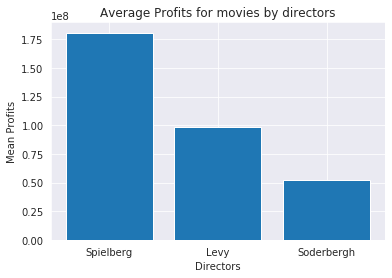

In [147]:
# plotting directors against the mean profits from their movies

locations = [1,2,3]
heights = [spiel, lev, sod]
labels = ['Spielberg', 'Levy', 'Soderbergh']

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Profits for movies by directors')
plt.xlabel('Directors')
plt.ylabel('Mean Profits');

The above analysis and visualizations show **Steven Spielberg**'s movies made the most profits between 2010 and 2015, followed by director **Shawn Levy** and finally director **Steven Soderbergh**'s movies making the least profits of the three.

Let's now see how each director's movies did in vote counts



### vote count

>**Note**: We look at the average vote count for movies produced by these directors between 2010 and 2015. We will also be using the same mask as in the profits analysis'

First, we get the mean vote counts for all votes cast on movies by these directors in the given period.

In [148]:
# Calculating mean votes for Spielberg's movies

df_dir.vote_count[Spielberg].mean()

1017.3333333333334

In [149]:


# calculating mean votes for Levy's movies

df_dir.vote_count[Levy].mean()

1059.8

In [150]:
# Calculating mean votes for Soderbergh's movies

df_dir.vote_count[Soderbergh].mean()

610.2

Now we create variables to store each resulting mean vote count for its specific director's mask.

In [151]:
# Creating variables to store each mask output 


Vspiel=df_dir.vote_count[Spielberg].mean()
Vlev =df_dir.vote_count[Levy].mean()
Vsod=df_dir.vote_count[Soderbergh].mean()

Let's plot our findings

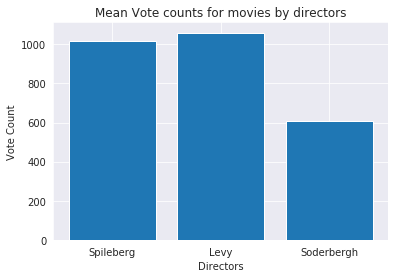

In [152]:
# plotting directors against the mean vote counts from their movies

locations = [1,2,3]
heights = [Vspiel, Vlev, Vsod]
labels = ['Spileberg', 'Levy', 'Soderbergh']
plt.bar(locations, heights, tick_label=labels)
plt.title('Mean Vote counts for movies by directors')
plt.xlabel('Directors')
plt.ylabel('Vote Count');

From the above analysis and visualizations, the most votes were cast on **Shawn levy**'s movies followed by **Steven Spielberg**'s movies and the least of the three being **Steven Sodrbergh**'s movies

Finally, let's look at which of the three directors movies had the highest, medium and lowest popularity.

### Popularity 

>**Note**: Just as in the analyses on profits and vote count, we will first get the mean populrity movies by these directors in the given period. We will use those to plot our finding.

We are also using the same mask as in the analyses earlier

In [153]:
# Calculating mean popularity for Spielberg's movies
df_dir.popularity[Spielberg].mean()

1.7132023333333333

In [154]:
# calculating mean popularity for Levy's movies
df_dir.popularity[Levy].mean()

2.2958002

In [155]:
# Calculating mean popularity for Soderbergh's movies
df_dir.popularity[Soderbergh].mean()

1.2718896000000002

Again, we create variables to store each resulting mean popularity value for its specific director's mask.

In [156]:
# Creating variables to store each mask output 

Pspiel=df_dir.popularity[Spielberg].mean()
Plev =df_dir.popularity[Levy].mean()
Psod=df_dir.popularity[Soderbergh].mean()

And finally, we plot our findings

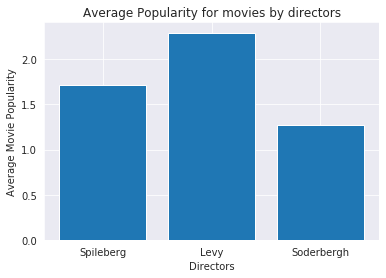

In [157]:
# plotting directors against the mean popularity from their movies

locations = [1,2,3]
heights = [Pspiel, Plev, Psod]
labels = ['Spileberg', 'Levy', 'Soderbergh']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Popularity for movies by directors')
plt.xlabel('Directors')
plt.ylabel('Average Movie Popularity');

The analysis and visualizations above show movies directed by **Shawn Levy** having the highest popularity followed by **Steven Spielberg**'s and those with the least popularity of the three are directed by **Steven Soderbergh**.

>**Note**: Below are conclusions as per the above analyses.

<a id='conclusions'></a>
## Conclusions

Based on the analyses done above, the conclusions for the two questions are as follows

> **1**: Medium-budget movies appeared to have made the highest mean profits, vote counts, popularity and average votes. High-budget films had median means of the three budget categories and Low-budget movies recorded the lowest means in each of the 4 variables. It is important to note that Low-budget movies were so much more compared to Medium-budget movies and High-budget movies which were only four(**4**). 
It is safe to conclude that there are relations between the four analyzed variables. Higher vote counts means more people watched a movie and voted, this could explain the inverse proportional relation with popularity as well as the average_vote index. More people watching a movie could mean increased popularity which could mean higher ratings. All these factors might explain Medium-budget films having the highest profit index.

>**Limitations**: In creating the rating columns and budget-type categories, I used the **cut()** function to define which movies were good, great or bad and which fell in the Low, Medium or High-budget categories. There could have been a better way to define the budget categories as well as rate movies .

> **2**: Findings from the second analysis aren't as straight forward as in the first. In this analysis, we see **Steven Spielberg**'s movies in the years 2010 to 2015 having the highest mean profits, median vote count, and median popularity. **Shawn Levy**'s rank in second in mean profits, highest mean vote counts and highest mean popularity while **Steven Soderbergh**'s ranking the least in all three variables.
Based on the findings, relations between the vote counts and popularity are just like those in the first analysis. However, the patterns for mean profits in this analysis do not fully correspond to those in the previous analysis.




<a id='references'></a>
## References

The following materials and sites were used as references in this analysis:

1. Statology.org

 How to add columns in pandas dataframe
 
 How to Perform Data Binning in Python
 
 Pandas: How to Drop Rows that Contain a Specific Value
 
 How to Drop Rows by Index in Pandas
 

2. Geeksforgeeks.org

 How to Filter DataFrame Rows Based on the Date in Pandas
